In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv('housing.csv')

In [4]:
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [5]:
numerical_features = df.select_dtypes(include=[np.number]).columns
print(numerical_features)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')


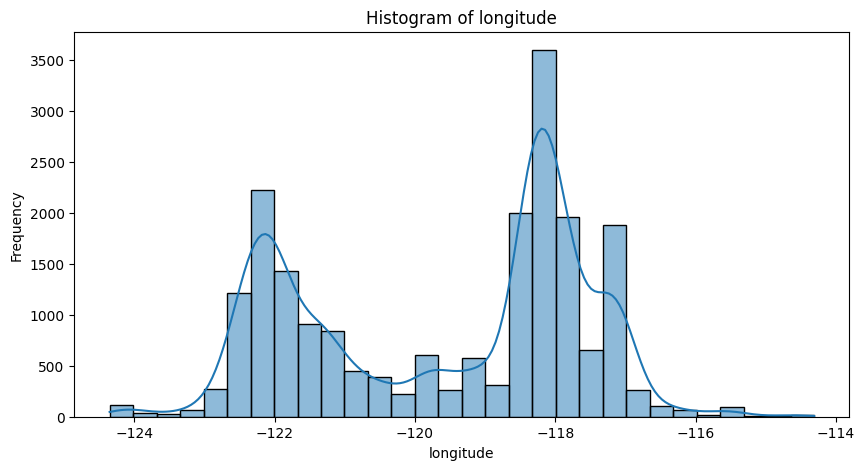

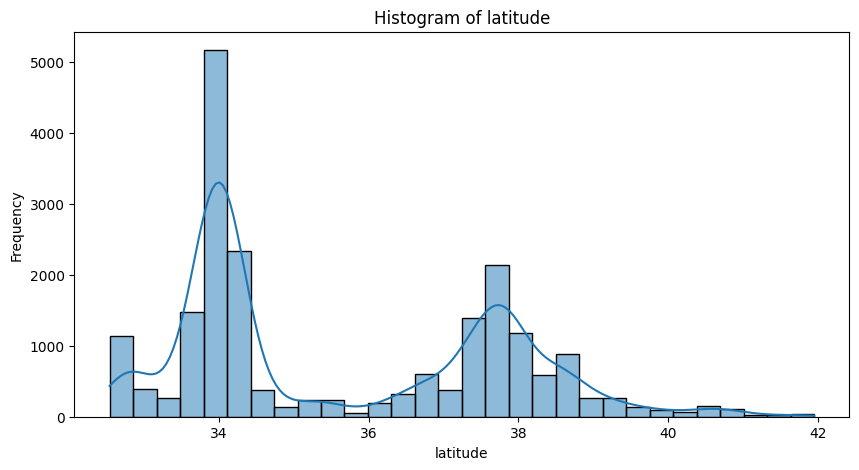

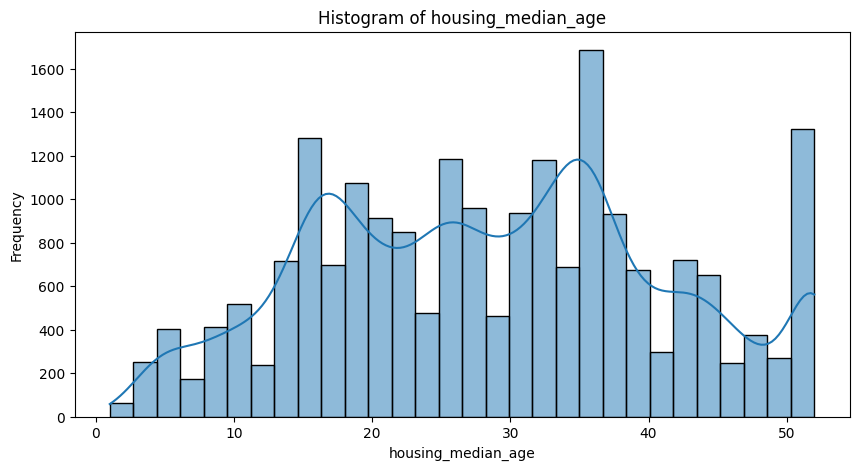

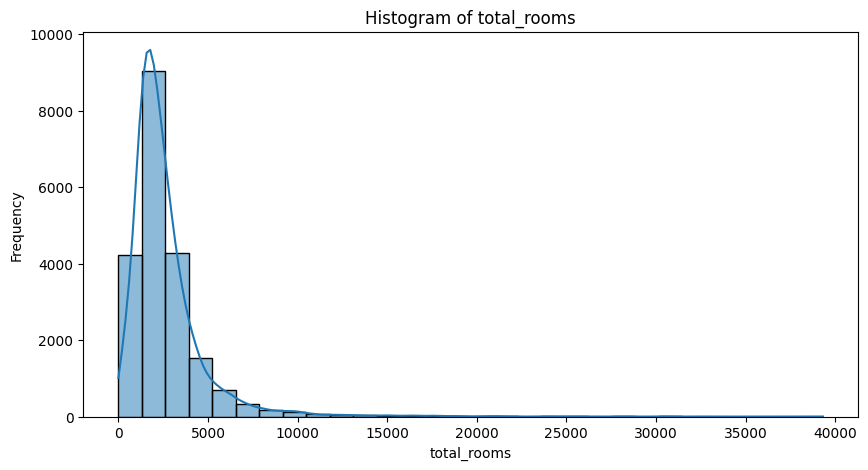

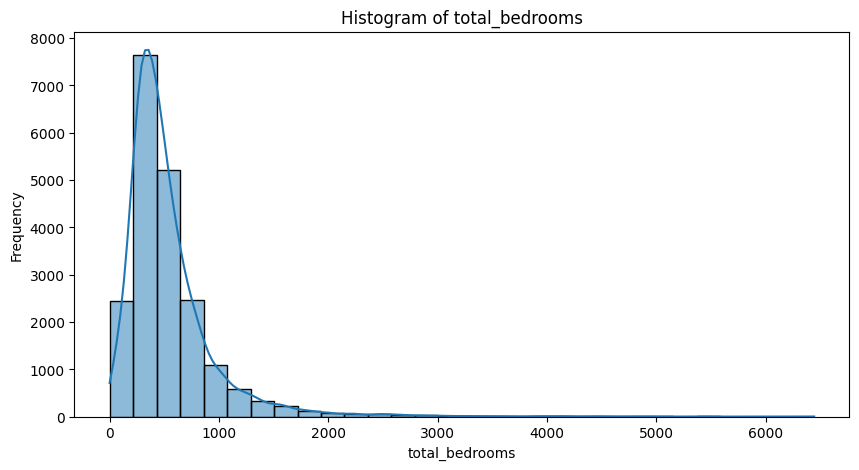

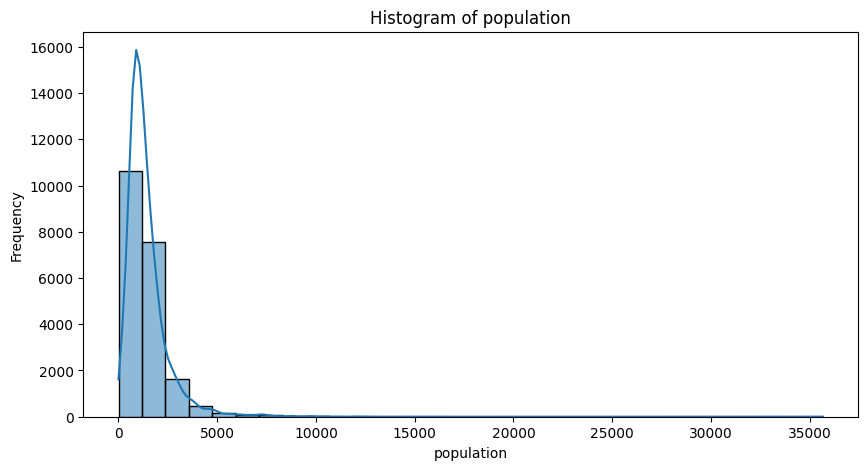

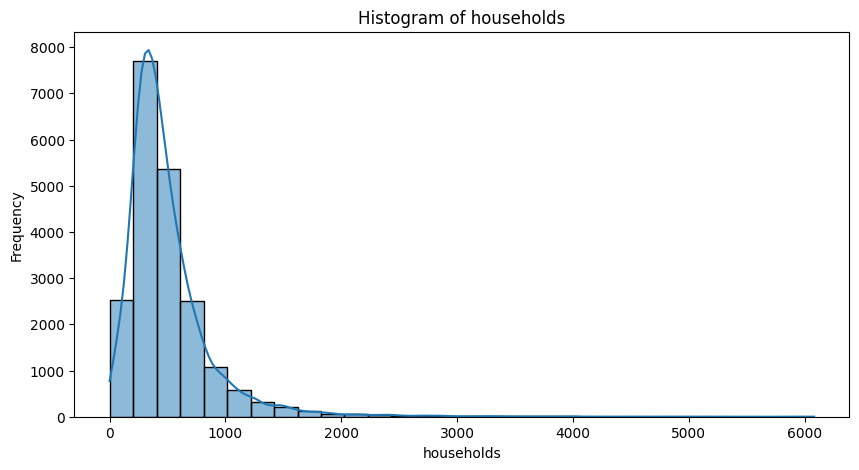

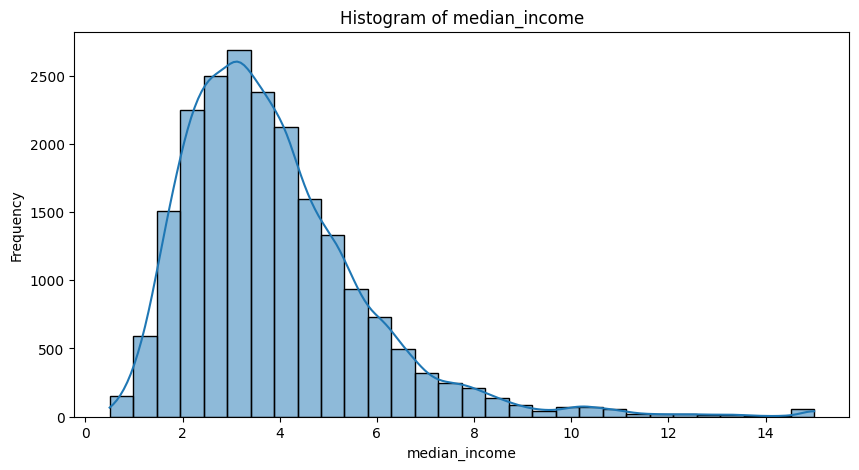

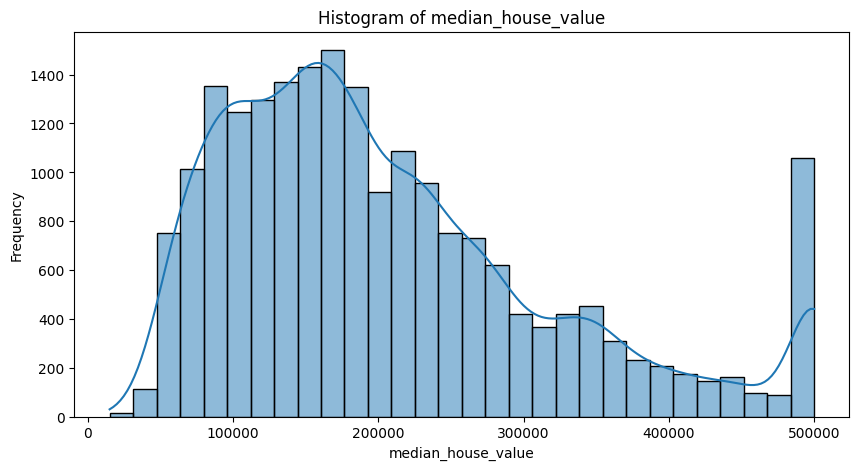

In [6]:
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

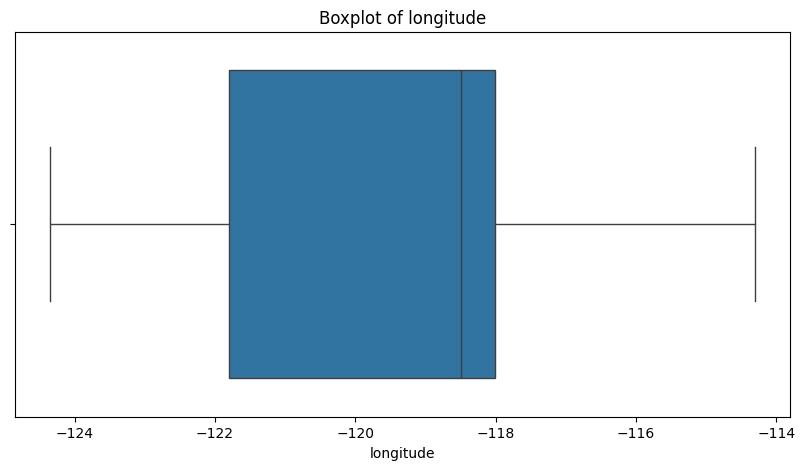

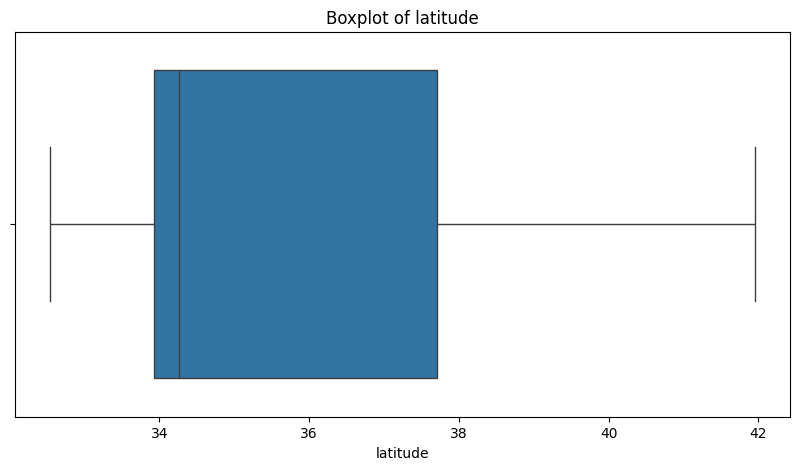

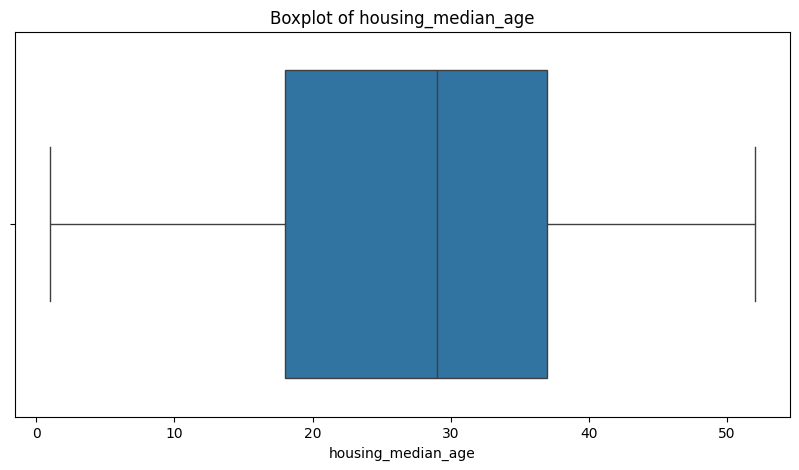

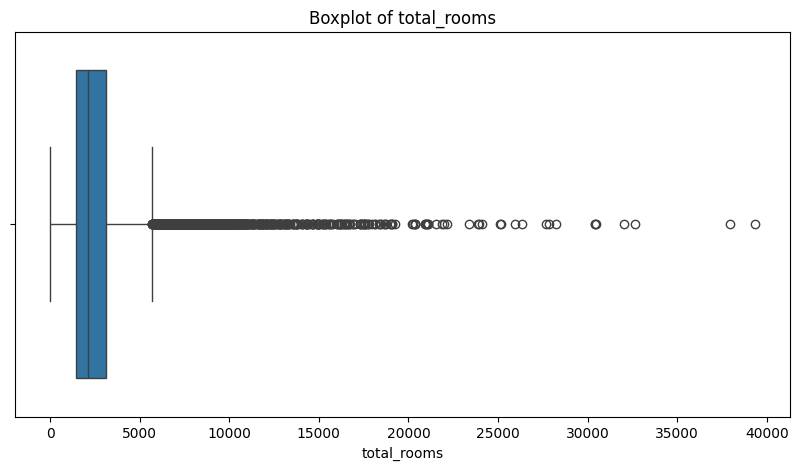

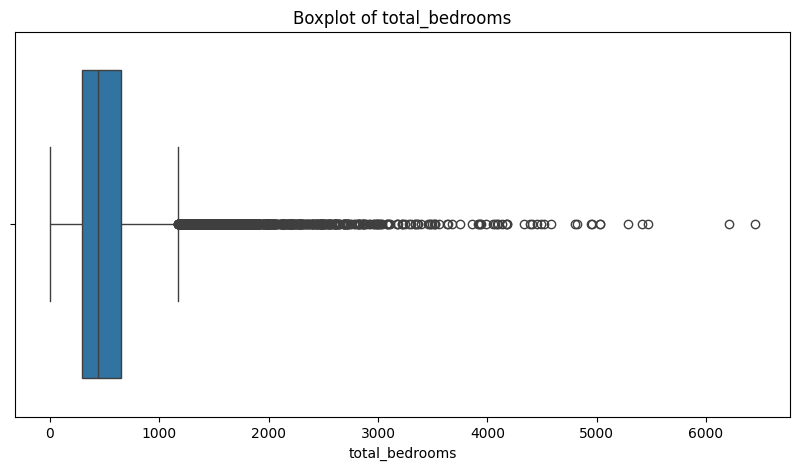

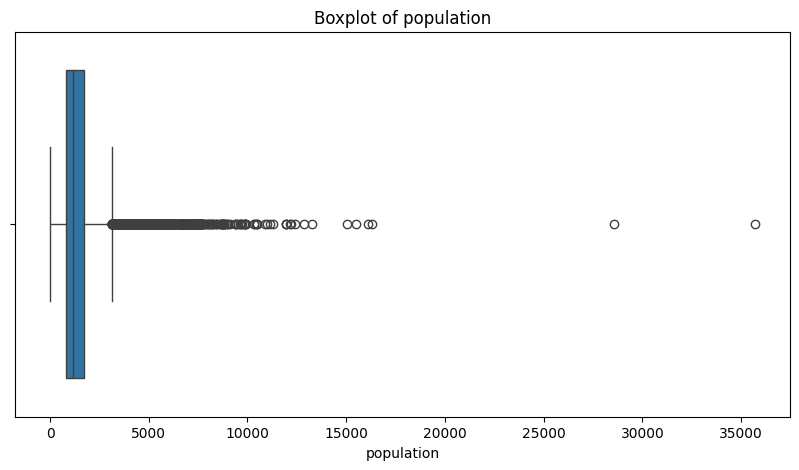

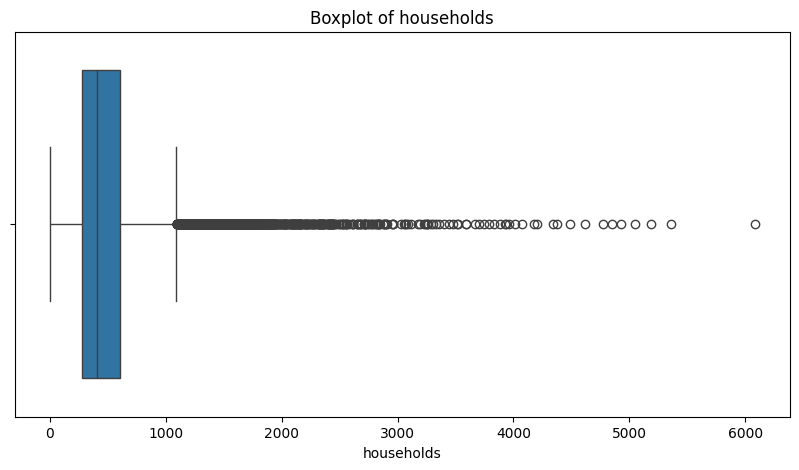

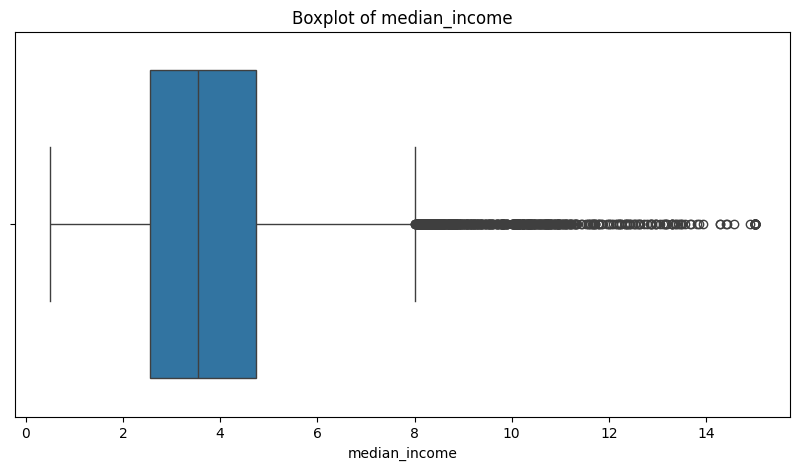

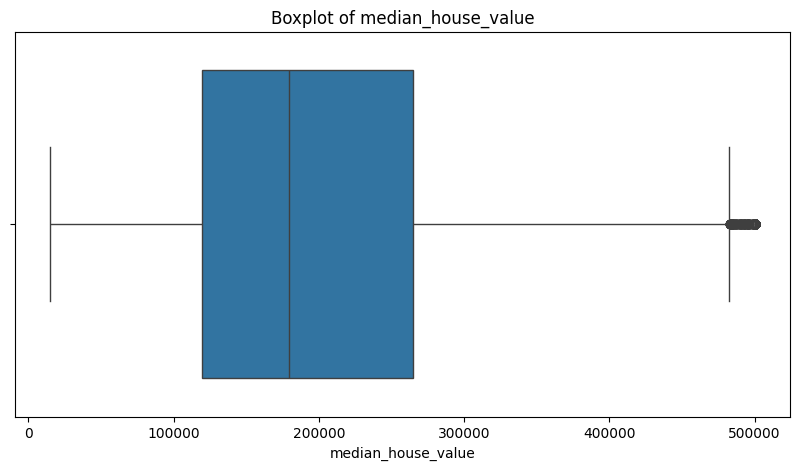

In [7]:
# Boxplot for numerical features
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()

In [8]:
for feature in numerical_features:
    q1 = np.percentile(df[feature].dropna(), 25)
    q3 = np.percentile(df[feature].dropna(), 75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    print(f"\nFeature: {feature}")
    print(f"Q1: {q1}")
    print(f"Q3: {q3}")
    print(f"IQR: {IQR}")
    print(f"Outliers for {feature}:")
    print(f"Number of outliers: {len(outliers)}")



Feature: longitude
Q1: -121.8
Q3: -118.01
IQR: 3.789999999999992
Outliers for longitude:
Number of outliers: 0

Feature: latitude
Q1: 33.93
Q3: 37.71
IQR: 3.780000000000001
Outliers for latitude:
Number of outliers: 0

Feature: housing_median_age
Q1: 18.0
Q3: 37.0
IQR: 19.0
Outliers for housing_median_age:
Number of outliers: 0

Feature: total_rooms
Q1: 1447.75
Q3: 3148.0
IQR: 1700.25
Outliers for total_rooms:
Number of outliers: 1287

Feature: total_bedrooms
Q1: 296.0
Q3: 647.0
IQR: 351.0
Outliers for total_bedrooms:
Number of outliers: 1271

Feature: population
Q1: 787.0
Q3: 1725.0
IQR: 938.0
Outliers for population:
Number of outliers: 1196

Feature: households
Q1: 280.0
Q3: 605.0
IQR: 325.0
Outliers for households:
Number of outliers: 1220

Feature: median_income
Q1: 2.5633999999999997
Q3: 4.74325
IQR: 2.17985
Outliers for median_income:
Number of outliers: 681

Feature: median_house_value
Q1: 119600.0
Q3: 264725.0
IQR: 145125.0
Outliers for median_house_value:
Number of outliers:

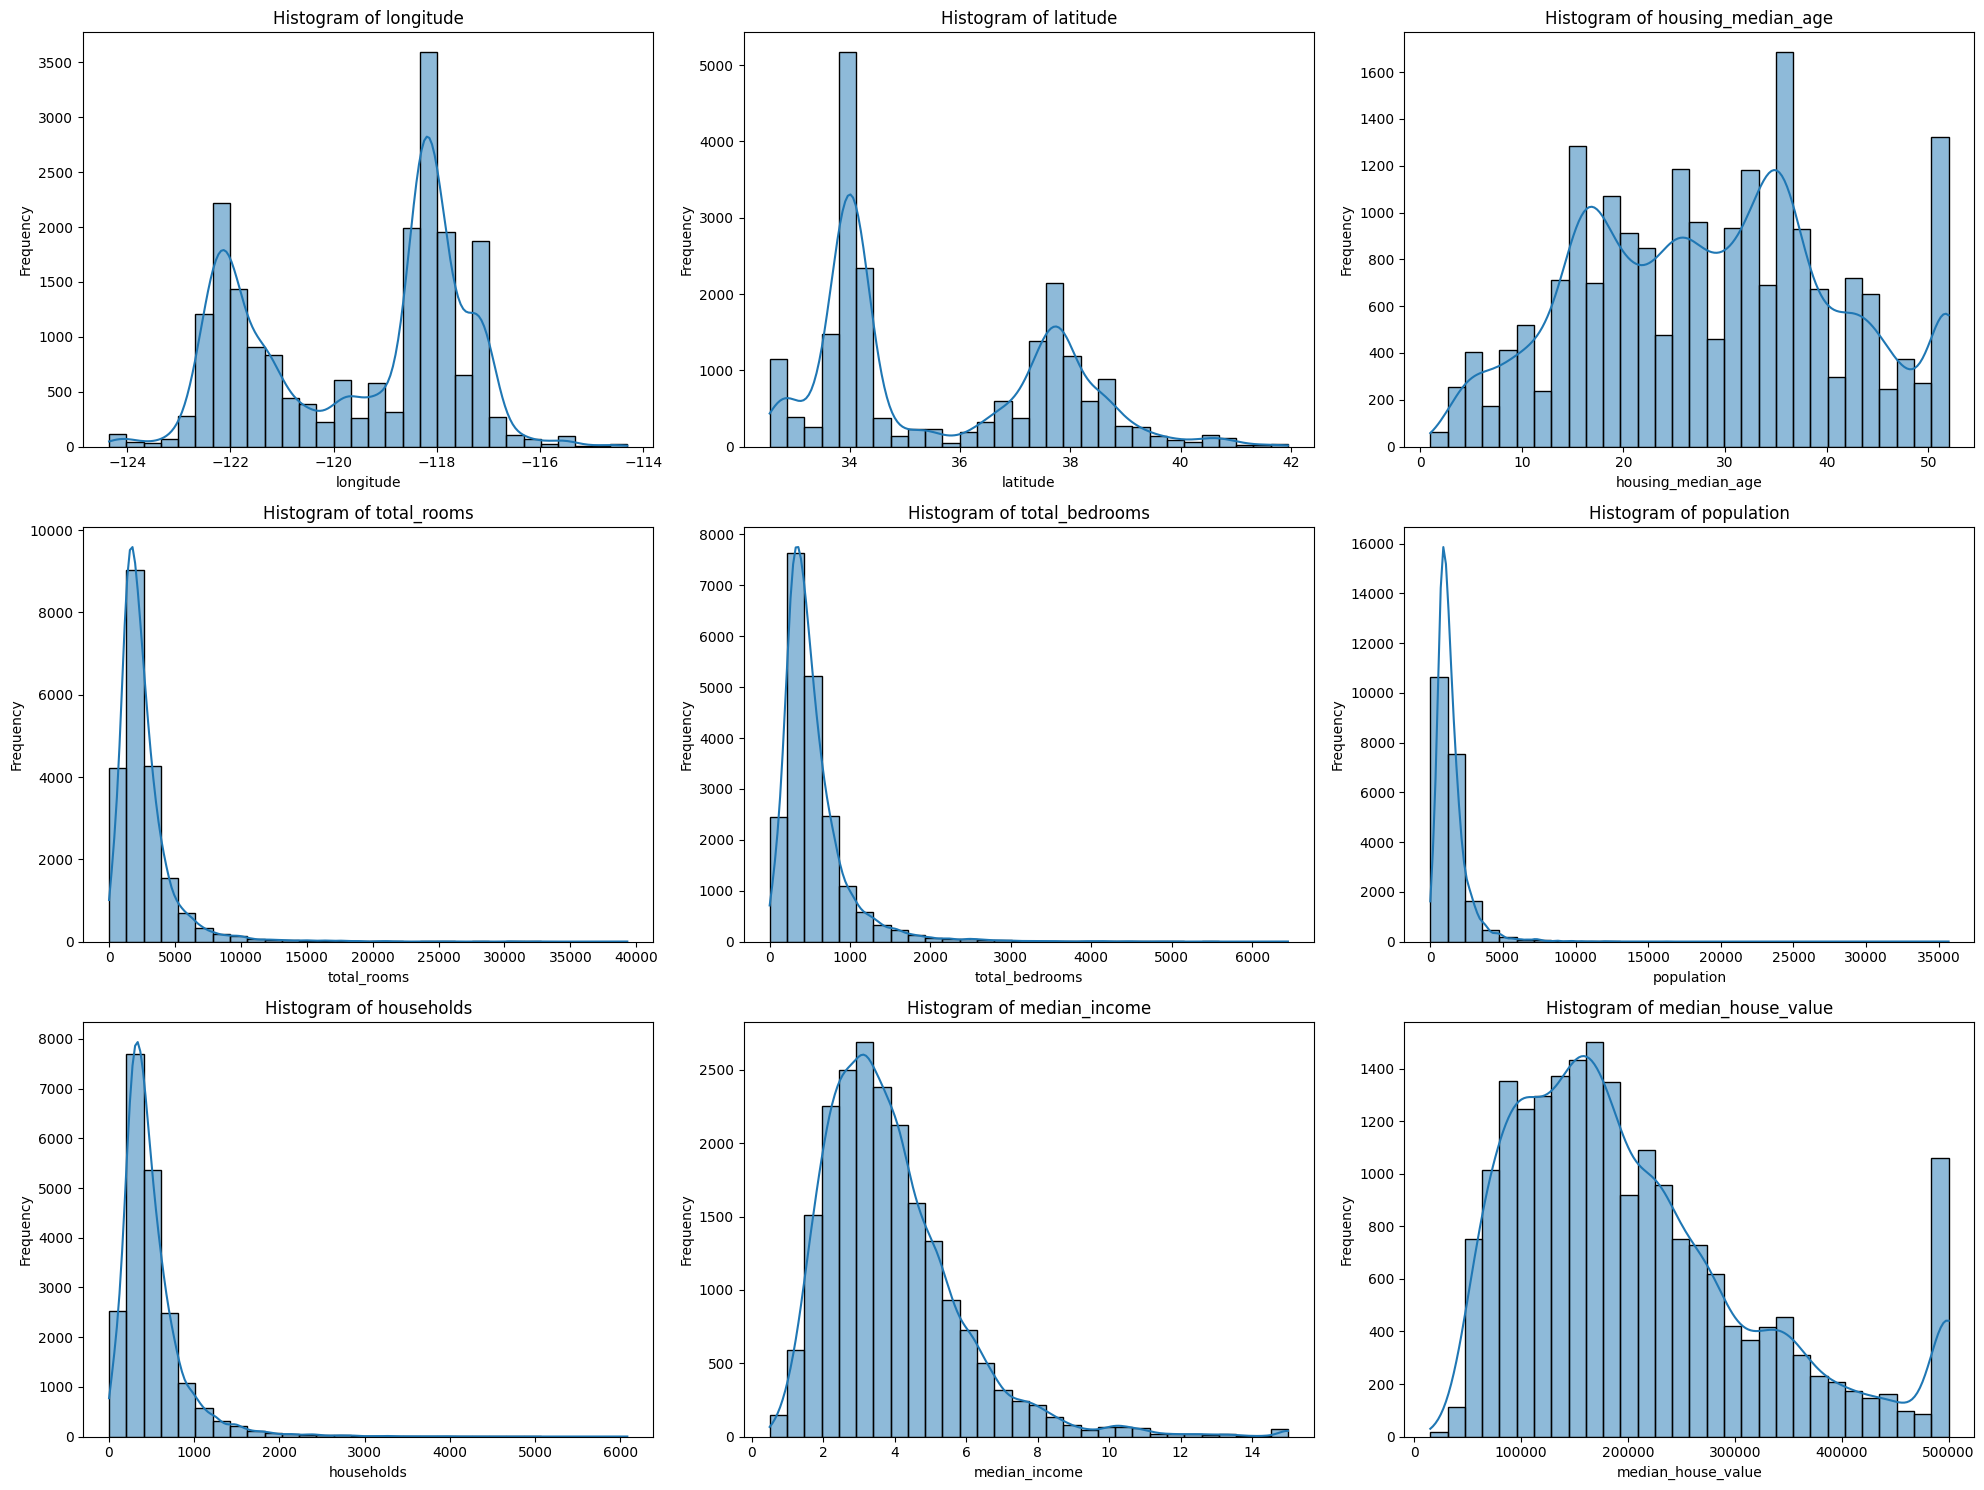

In [9]:
# Create a single figure with subplots for all numerical features
plt.figure(figsize=(20, 15))
num_features = len(numerical_features)
rows = (num_features + 2) // 3  # Calculate number of rows needed (3 plots per row)

for i, feature in enumerate(numerical_features):
    plt.subplot(rows, 3, i+1)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

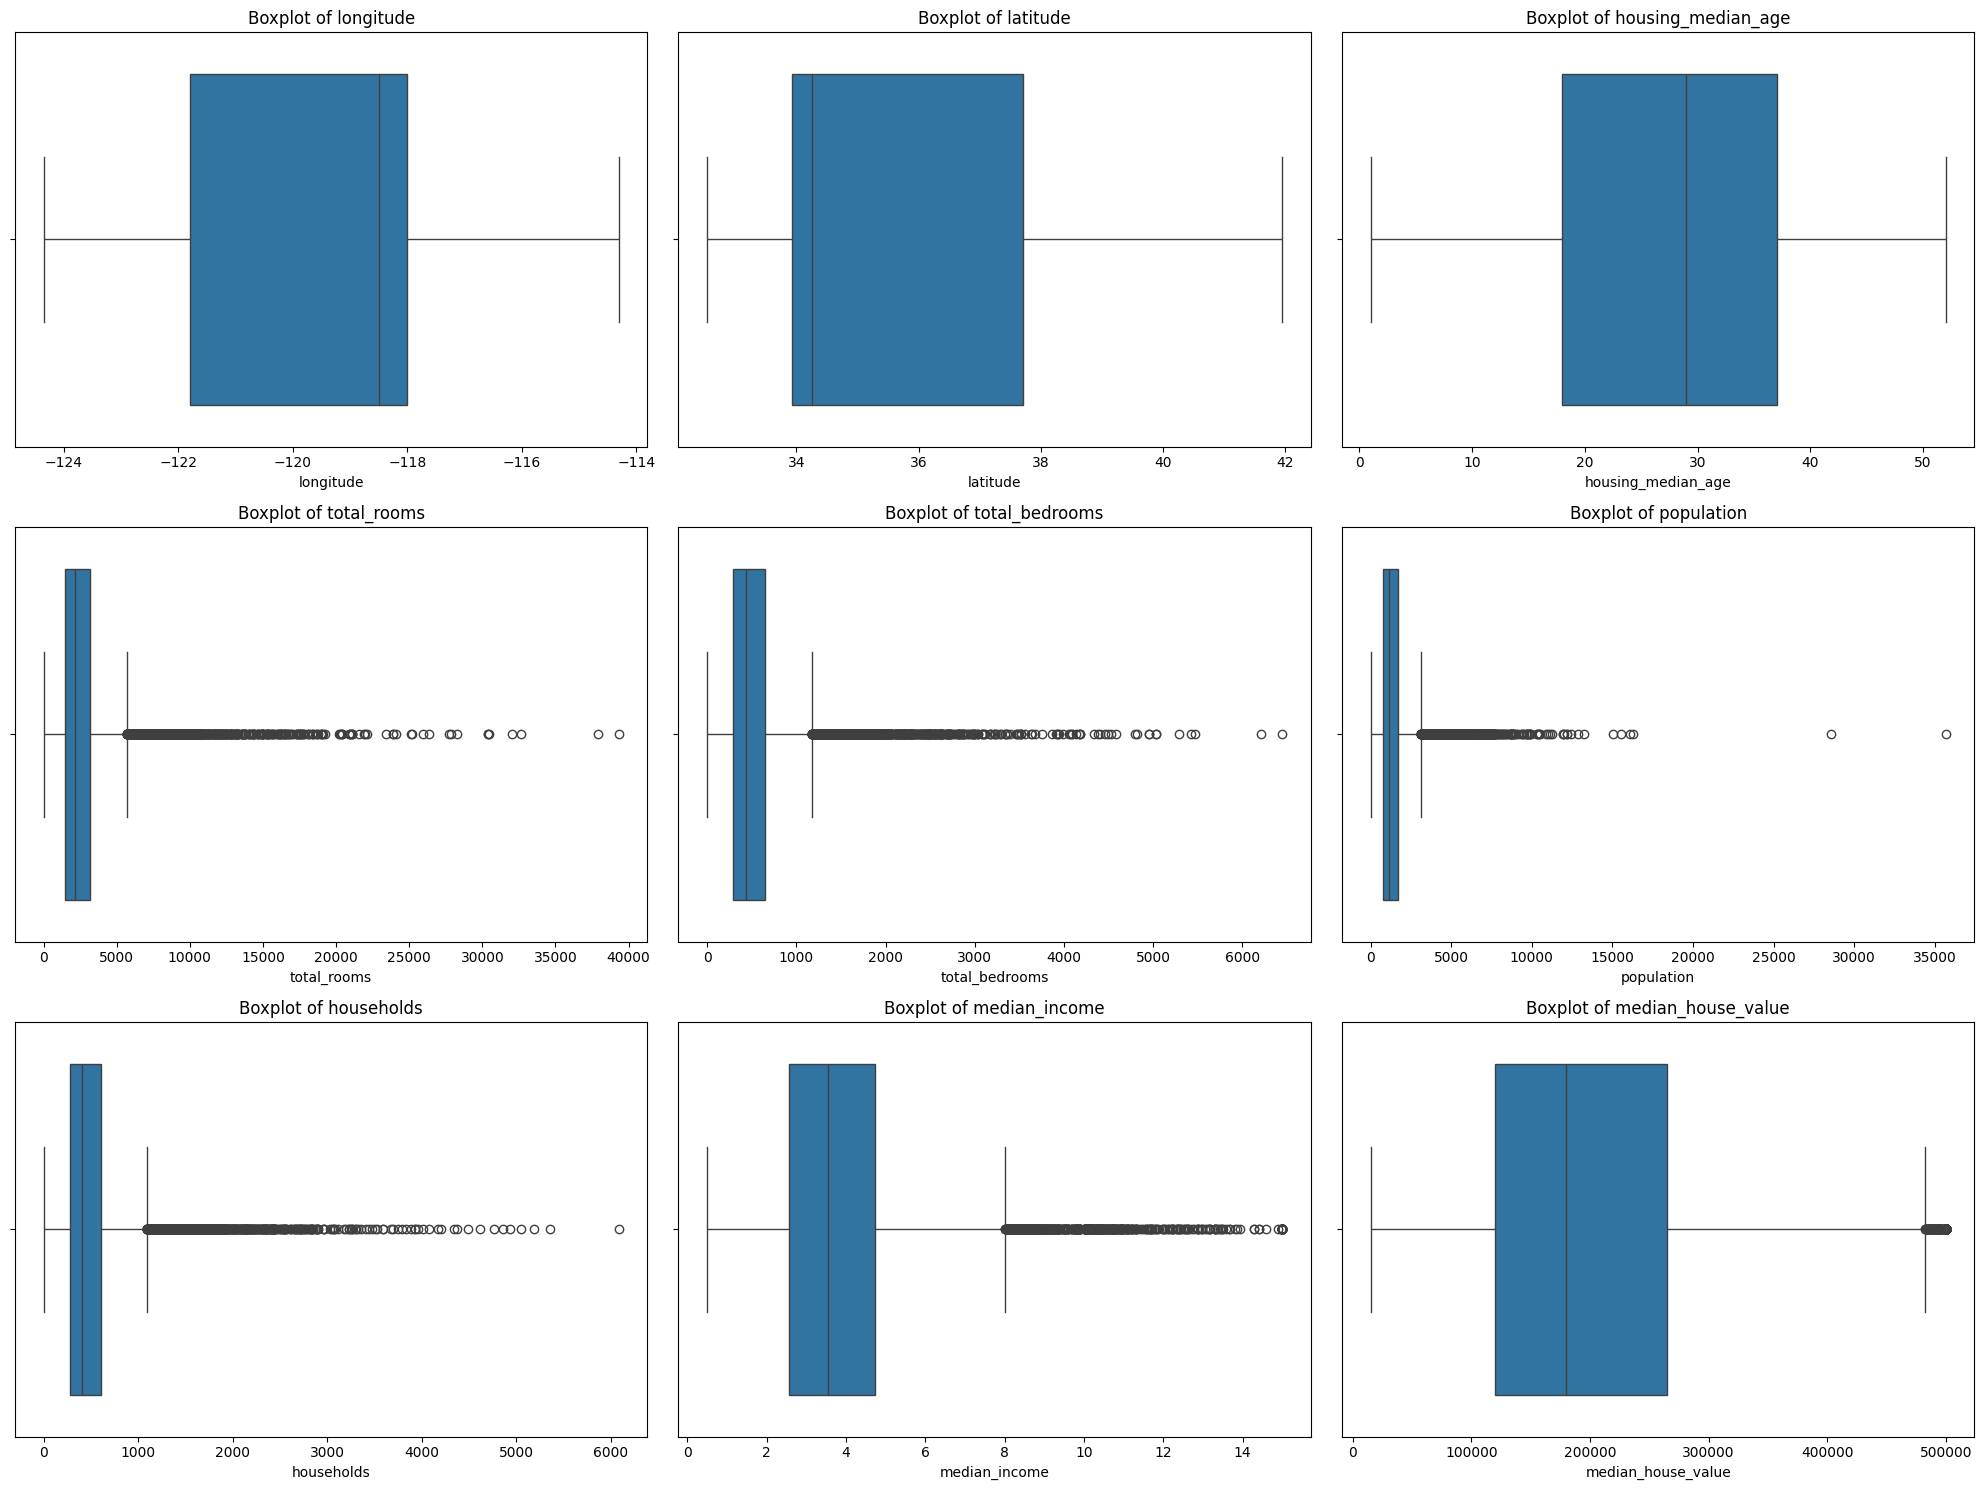

In [10]:
# Create a single figure with subplots for all numerical features
plt.figure(figsize=(20, 15))
num_features = len(numerical_features)
rows = (num_features + 2) // 3  # Calculate number of rows needed (3 plots per row)

for i, feature in enumerate(numerical_features):
    plt.subplot(rows, 3, i+1)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()